<a href="https://colab.research.google.com/github/an1mebit/Navigation_system/blob/main/Third_labipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import random
from scipy import integrate as ig
from sympy import integrate, Symbol, lambdify
import matplotlib.pyplot as plt

In [2]:
with open('GIB_10ms.ris', encoding="utf-8") as f:
  read_data = f.read()

GIB_10 = read_data.replace('\n', ' ').split(' ')
GIB_10 = [x for x in GIB_10 if x != '' and x!= 'DVy']
GIB_10_t = []
GIB_10_v = []
for i in range(len(GIB_10)):
  if not i % 2:
    GIB_10_t.append(GIB_10[i])
  else:
    GIB_10_v.append(GIB_10[i])

with open('GIB_1ms.ris', encoding="utf-8") as f:
  read_data = f.read()

GIB_1 = read_data.replace('\n', ' ').split(' ')
GIB_1 = [x for x in GIB_1 if x != '' and x!= 'DVy']

GIB_1_t = []
GIB_1_v = []
for i in range(len(GIB_1)):
  if not i % 2:
    GIB_1_t.append(GIB_1[i])
  else:
    GIB_1_v.append(GIB_1[i])

In [3]:
#Приведем к float

GIB_10_v = list(map(float,GIB_10_v))
GIB_10_t = list(map(float,GIB_10_t))

GIB_1_t = list(map(float, GIB_1_t))
GIB_1_v = list(map(float, GIB_1_v))

In [4]:
#Таблицы времени и высоты к каждому измерению

GIB_1_DATA = pd.DataFrame(columns=('GIB_1_H', 'GIB_1_T'))
GIB_100_DATA = pd.DataFrame(columns=('GIB_10_H', 'GIB_10_T'))

In [ ]:
delta_t_10 = GIB_10_t[1] - GIB_10_t[0]
delta_t_1 = GIB_1_t[1] - GIB_1_t[0]

h_last_1: float = 0
v_last_1: float = 0
for one_prob in range(len(GIB_1_t)):
  print(one_prob)
  delta_v = float(GIB_1_v[one_prob]) * delta_t_1
  v_last_1 += delta_v
  h_last_1 += v_last_1*delta_t_1

  GIB_1_DATA.loc[len(GIB_1_DATA)] = [h_last_1, GIB_1_t[one_prob]]

In [ ]:
h_last_10: float = 0
v_last_10: float = 0
for one_prob in range(len(GIB_10_t)):
  delta_v = float(GIB_10_v[one_prob]) * delta_t_10
  v_last_10 += delta_v
  h_last_10 += v_last_10*delta_t_10

  GIB_100_DATA.loc[len(GIB_100_DATA)] = [h_last_10, GIB_10_t[one_prob]]

GIB_100_DATA

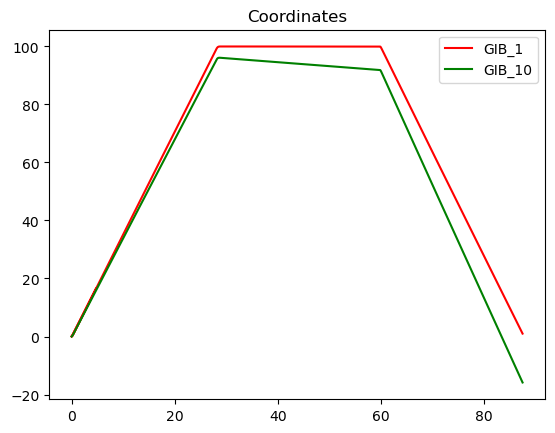

In [11]:
plt.plot(GIB_1_DATA['GIB_1_T'], GIB_1_DATA['GIB_1_H'], 'r', label='GIB_1')
plt.plot(GIB_100_DATA['GIB_10_T'], GIB_100_DATA['GIB_10_H'], 'g', label='GIB_10')
plt.legend()
plt.title('Coordinates')
plt.show()